In [1]:
from sklearn.tree import DecisionTreeClassifier  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego

#import dtreeviz.trees as dtv # importowanie dtreeviz

import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.model_selection import cross_val_score,  StratifiedKFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer


from sklearn.model_selection import cross_val_score,  StratifiedKFold
from sklearn.metrics import f1_score

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_T.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df['scale'].value_counts()

T1    496
T3    327
T2    132
Name: scale, dtype: int64

In [4]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)

In [29]:
ftwo_scorer = make_scorer(f1_score,greater_is_better=True, average='macro')


In [51]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'min_samples_split':range(2,30,5),
    'min_samples_leaf': range(1,30,5),    
    'max_leaf_nodes':range(2,30,5),
    'min_impurity_decrease':[0,0.1,0.2],
    'max_depth':list(range(2, 30,5))
}

In [52]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 7, 12, 17, 22, 27],
                         'max_leaf_nodes': range(2, 30, 5),
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': range(1, 30, 5),
                         'min_samples_split': range(2, 30, 5),
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [53]:
grid_search_1.best_score_

0.47615768040512796

In [54]:
grid_search_1.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_leaf_nodes': 27,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 27,
 'splitter': 'random'}

### Dobieranie part.2

In [55]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'min_samples_split':range(20,45,5),
    'min_samples_leaf': range(1,12,5),    
    'max_leaf_nodes':range(20,60,5),
    'min_impurity_decrease':[0],
    'max_depth':list(range(15, 45,5))
}

In [56]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25, 30, 35, 40],
                         'max_leaf_nodes': range(20, 60, 5),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(1, 12, 5),
                         'min_samples_split': range(20, 45, 5),
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [57]:
grid_search_1.best_score_

0.4952924644555834

In [58]:
grid_search_1.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 55,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'splitter': 'random'}

## Dobieranie part .4

In [59]:
param_grid = {
    'criterion':['entropy'],
    'splitter':['random'],
    'min_samples_split':range(20,45,5),
    'min_samples_leaf': range(1,6,1),    
    'max_leaf_nodes':range(50,90,5),
    'min_impurity_decrease':[0],
    'max_depth':list(range(15, 40,5))
}

In [60]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [15, 20, 25, 30, 35],
                         'max_leaf_nodes': range(50, 90, 5),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(20, 45, 5),
                         'splitter': ['random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [61]:
grid_search_1.best_score_

0.49618240063413754

In [62]:
grid_search_1.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 60,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'splitter': 'random'}

## Dobieranie part .5

In [69]:
param_grid = {
    'criterion':['entropy'],
    'splitter':['random'],
    'min_samples_split':range(30,40,1),
    'min_samples_leaf': range(1,4,1),    
    'max_leaf_nodes':range(50,65,1),
    'min_impurity_decrease':[0],
    'max_depth':list(range(15, 25,1))
}

In [70]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
                         'max_leaf_nodes': range(50, 65),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(30, 40),
                         'splitter': ['random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [71]:
grid_search_1.best_score_

0.5005996819418085

In [72]:
grid_search_1.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_leaf_nodes': 51,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 2,
 'min_samples_split': 35,
 'splitter': 'random'}

In [73]:
grid_search_1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=51,
                       min_impurity_decrease=0, min_samples_leaf=2,
                       min_samples_split=35, random_state=42,
                       splitter='random')

## Cross-walidacja

In [74]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    dt_2 =DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=51,
                       min_impurity_decrease=0, min_samples_leaf=2,
                       min_samples_split=35, random_state=42,
                       splitter='random')
    

    dt_2.fit(zestaw_caly[train], caly_label[train])
    predykcje=dt_2.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=f1_score(caly_label[test], predykcje,average='macro')
    wart_2.append(blad)
    licznik+=1

In [75]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_T_Drzewo_decyzyjne.csv')

In [2]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\T\\Klasa_T_Drzewo_decyzyjne.csv')

In [76]:
wart_2

[0.41840954744180553,
 0.5253790375741595,
 0.4736968821475864,
 0.39177225471085125,
 0.4050182407180379]

In [84]:
sum(wart_2)/5

0.44285519251848815

In [77]:
dane_do_zapisu_2

,pred,obs,Fold
0,T1,T1,1
1,T1,T1,1
2,T1,T1,1
3,T3,T1,1
4,T2,T1,1
...,...,...,...
186,T1,T3,5
187,T1,T3,5
188,T1,T3,5
189,T3,T3,5


In [3]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [4]:
cf_matrix

array([[372,  15, 109],
       [ 66,  16,  50],
       [156,  19, 152]], dtype=int64)

In [5]:
import seaborn as sns

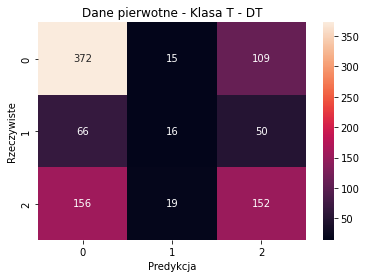

In [6]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa T - DT')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [7]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
f1score=f1_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], average='macro')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.445
Precision: 0.478
F1score: 0.445
